<a href="https://colab.research.google.com/github/katarinagresova/M7DataSP_2020/blob/erik/assignment_03/mnist_fashion_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout

print(tf.__version__)

2.3.0


## Data

In [36]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [37]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [39]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

## Plotting

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


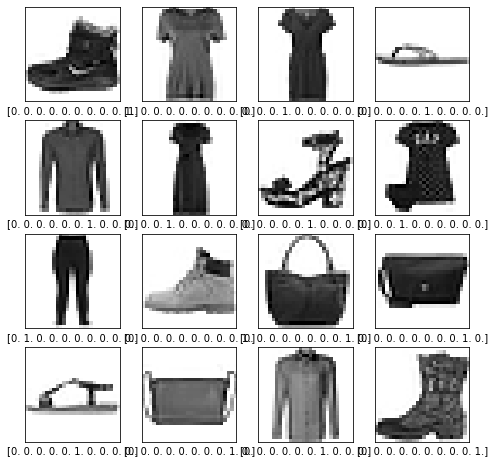

In [40]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), y_train[i])


## Convolutional Neural Network

Goal of this part of homework is: "Play a bit with the model architecture, learning rate and other parameters. Train only for 10 epochs but try to get as high accuracy as possible."

TODO:

*   More comparisons - architectures, parameters
*   Improve plotting of results





### Model definitions

We can create multiple models and compare their performance. All models will be stored in variable `models`.

In [47]:
#holder for all models
models = []

In [48]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.6),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.6),
      layers.Dense(10, activation='softmax')
])

models.append(["cnn", cnn_model])

cnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_39 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_17 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)              

In [49]:
#architecture inspired by VGG16
vgg16_model = keras.Sequential([
      Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
      Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
      MaxPool2D(pool_size=(2,2),strides=(2,2)),
      Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
      Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
      Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
      MaxPool2D(pool_size=(2,2),strides=(2,2)),
      Flatten(),
      Dense(units=4096,activation="relu"),
      Dropout(0.6),
      Dense(units=4096,activation="relu"),
      Dropout(0.6),
      Dense(units=10, activation="softmax")
])

models.append(["vgg16", vgg16_model])

vgg16_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 128)       

In [50]:
erik_model = keras.Sequential([
      Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3),padding="same", activation="relu"),
      MaxPool2D(pool_size=(2,2),strides=(2,2)),
      Dropout(0.2),
      Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
      MaxPool2D(pool_size=(2,2),strides=(2,2)),
      Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
      MaxPool2D(pool_size=(2,2),strides=(2,2)),
      Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
      Flatten(),
      Dense(units=4096,activation="relu"),
      Dropout(0.5),
      Dense(units=2048,activation="relu"),
      Dropout(0.5),
      Dense(units=1024,activation="relu"),
      Dense(units=10, activation="softmax")
])

models.append(["erik", erik_model])

erik_model.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 128)       

### Evaluation

In [51]:
histories = []
for model in models:
  model[1].compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])
  print("Running model:", model[0])
  histories.append([model[0],
      model[1].fit(
        x_train, y_train,
        batch_size = 256,
        epochs = 10,
        validation_data = (x_test, y_test),
        verbose = 1
      )
  ])

Running model: cnn
Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6985 - accuracy: 0.7555 - val_loss: 0.4102 - val_accuracy: 0.8511
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.4657 - accuracy: 0.8355 - val_loss: 0.3601 - val_accuracy: 0.8693
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4076 - accuracy: 0.8545 - val_loss: 0.3311 - val_accuracy: 0.8795
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3705 - accuracy: 0.8662 - val_loss: 0.3108 - val_accuracy: 0.8871
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3428 - accuracy: 0.8760 - val_loss: 0.2910 - val_accuracy: 0.8932
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3225 - accuracy: 0.8831 - val_loss: 0.2748 - val_accuracy: 0.8994
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3033 - accuracy: 0.8895 - val_loss: 0.2760 - v

In [52]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history[1].history['accuracy'], label=history[0]+':accuracy')
  plt.plot(history[1].history['val_accuracy'], label=history[0]+':val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

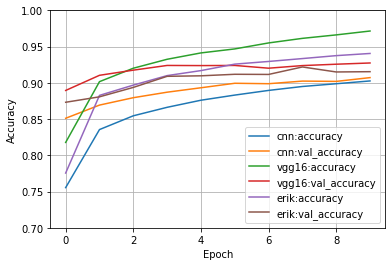

In [53]:
for history in histories:
  plot_loss(history, ylim=(0.7, 1)) # co znamena ze erik val accuracy tam ma schodiky

## Confusion matrix
Goal of this part of assignment: "Calculate the confusion matrix for your model. Which pair of fashion items is the most often misclassified."

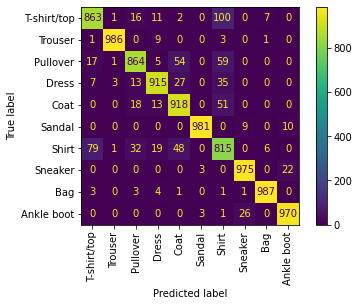

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## store vgg16_model
model = models[1][1]

predictions = model.predict(x_test, batch_size=256)

# we need to have labels in format [0, 4, 3, 4, 9, ... 2]
y_pred = np.argmax(predictions, axis=1)
y_test_index = np.argmax(y_test, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_index, y_pred),
                                  display_labels=clothes_labels)
disp.plot(xticks_rotation='vertical', values_format='.4g')

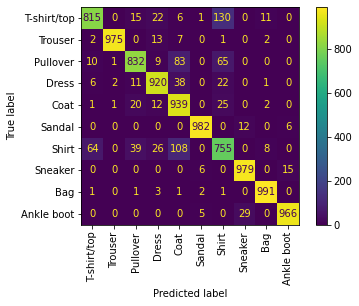

In [55]:
## store erik_model
model = models[2][1]

predictions = model.predict(x_test, batch_size=256)

y_pred = np.argmax(predictions, axis=1)
y_test_index = np.argmax(y_test, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_index, y_pred),
                                  display_labels=clothes_labels)
disp.plot(xticks_rotation='vertical', values_format='.4g')